# The Hashing Trick 

In [1]:
# A hash function takes an input a token and outputs a hash value.
# For example, the input may be a string and the hash value may be an integer.

# Here is an example:
def simple_hash(x):
    a = 8
    return len(x)*7 % a

simple_hash("test")

4

In [2]:
# python has a hash function
hash("this is a test")

5771532706912031503

In [7]:
# We can use it to turn categorical variables into any number of feature columns:

from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=5,input_type='string')
D = [['dog'], ['cat'], ['elephant']]
f = h.transform(D)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.,  0.]])

# Feature Selection

In [4]:
# Removing features with low variance:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [5]:
# Example for Univariate feature selection 

# Load packages
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4
Reduced feature number: 2


In [6]:
# Recursive feature elimination:
from sklearn.svm import SVC
from sklearn.datasets import load_digits 
from sklearn.feature_selection import RFE


# Feature Importance 

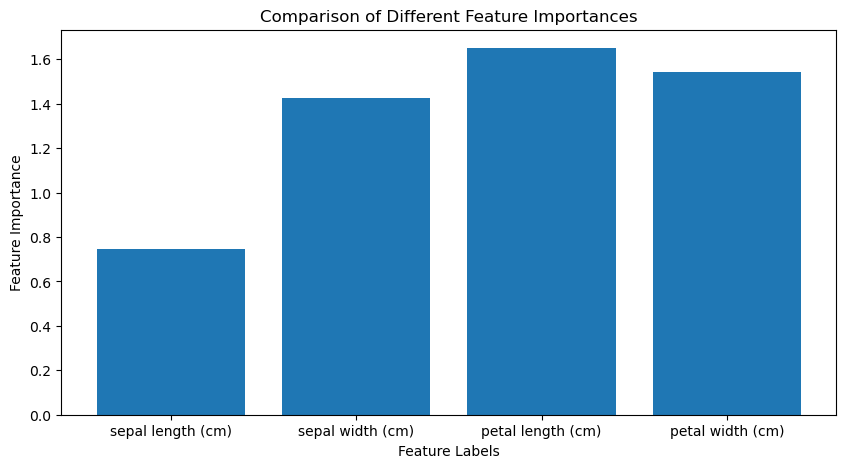

In [7]:
# Load libraries
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
 
 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                         criterion ='entropy', 
                                         max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importance's
feature_importance_std = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(iris_dataset.feature_names, feature_importance/feature_importance_std)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Comparison of Different Feature Importances');